<a href="https://colab.research.google.com/github/thejkiran-p/Assessment_PostDoc/blob/main/DisplayImages_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## Accessing the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
## Importing required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import imageio
import re
import glob
import pandas as pd

In [17]:
## Giving the folder location of the Class lables correspinding to the dataset 
!ls /content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/csv/

csv-1.csv  csv-2.csv  csv-3.csv  csv-4.csv  csv-5.csv


In [18]:
## File paths of the data
npz_file_dir="/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/npz/"

image_file_dir = "/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/Images/"

csv_file_dir = "/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/csv/"

In [20]:
## Getting the file paths of npz and csv files
## Creating new folder to save images
## Get information of class labels in dictionary format
def getFiles(filePath_npz, filePath_csv, LS_imagePath):

  npzFolderDir_LS = []
  csvFolderDir_LS = []

  label_DICT_LS = []

  fileList_npz = sorted(os.listdir(filePath_npz))
  fileList_csv = sorted(os.listdir(filePath_csv))

  folder_new = filePath_npz.replace('npz', 'images')
  print(folder_new)

  for eachFile_npz, eachFile_csv in zip(fileList_npz, fileList_csv):

    npzFilePath = filePath_npz + eachFile_npz
    npzFolderDir_LS.append(npzFilePath)

    csvFilePath = filePath_csv + eachFile_csv
    print('Current CSV file path :: ' +str(csvFilePath))

    imgFilePath = filePath_npz+eachFile_npz+'/'

    newFolderPath = folder_new +  eachFile_npz.replace('.npz' , '')+'/'
    
    ## Giving the folder location of the dataset 
    '!ls '+newFolderPath+'/'
    os.makedirs(newFolderPath)        
    
    LS_imagePath.append(newFolderPath)

    #print('Current CSV file name :: ' +str(eachFile_csv))

    ## Opening CSV file to read class labels
    label_DF = pd.read_csv(csvFilePath)

    label_DICT = label_DF.set_index('0').T.to_dict('list')
    print(label_DICT)
    print(len(label_DICT))

    label_DICT_LS.append(label_DICT)
  print('Number of class labels dictionaries :: ' +str(len(label_DICT_LS)))
    
  return(npzFolderDir_LS, LS_imagePath, label_DICT_LS)




imagePath_LS = [] 
filePaths_LS = getFiles(npz_file_dir, csv_file_dir, imagePath_LS)
npz_folderPath = filePaths_LS[0]
img_folderPath = filePaths_LS[1]
classLabel_DICT_LS = filePaths_LS[2]

/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/images/
Current CSV file path :: /content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/csv/csv-1.csv
{1: [1], 2: [1], 3: [1], 4: [1], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1], 10: [1], 11: [1], 12: [1], 13: [1], 14: [1], 15: [1], 16: [1], 17: [1], 18: [1], 19: [1], 20: [1], 21: [1], 22: [1], 23: [1], 24: [0], 25: [0], 26: [0], 27: [0], 28: [0], 29: [0], 30: [0], 31: [0], 32: [0], 33: [0], 34: [0], 35: [0], 36: [0], 37: [0], 38: [0], 39: [0], 40: [0], 41: [0], 42: [0], 43: [0], 44: [0], 45: [0], 46: [0], 47: [0], 48: [0], 49: [0], 50: [0], 51: [0], 52: [0], 53: [0], 54: [0], 55: [0], 56: [0], 57: [0], 58: [0], 59: [0], 60: [0], 61: [0], 62: [0], 63: [0], 64: [0], 65: [0], 66: [0], 67: [0], 68: [0], 69: [0], 70: [0], 71: [0], 72: [0], 73: [0], 74: [0], 75: [0], 76: [0], 77: [0], 78: [0], 79: [0], 80: [0], 81: [0], 82: [0], 83: [0], 84: [1], 85: [1], 86: [1], 87: [1], 88: [1], 89: [1], 90: [1], 91: [1], 92: [1], 93: [1], 94: [1], 95: [

/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/npz/npz-1.npz
/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/images/npz-1/
['arr_0'] <class 'list'>
Name of the file :: arr_0
Number of dimension of the array :: 4
Shape of the array :: (126, 1, 128, 128)
Data after reshaping
4 (126, 128, 128, 1)
4 (126, 128, 128, 1)
<class 'list'> 126
/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/npz/npz-2.npz
/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/images/npz-2/
['arr_0'] <class 'list'>
Name of the file :: arr_0
Number of dimension of the array :: 4
Shape of the array :: (136, 1, 128, 128)
Data after reshaping
4 (136, 128, 128, 1)
4 (136, 128, 128, 1)
<class 'list'> 136
/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/npz/npz-3.npz
/content/drive/MyDrive/ImageAnalysis/Angio_Toy_Dataset/images/npz-3/
['arr_0'] <class 'list'>
Name of the file :: arr_0
Number of dimension of the array :: 4
Shape of the array :: (174, 1, 128, 128)
Data after reshaping
4 (174, 128

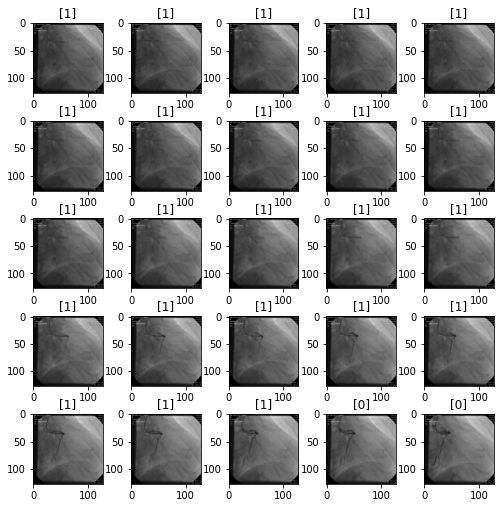

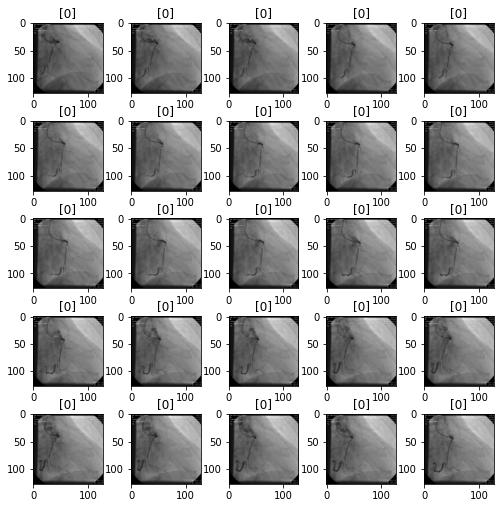

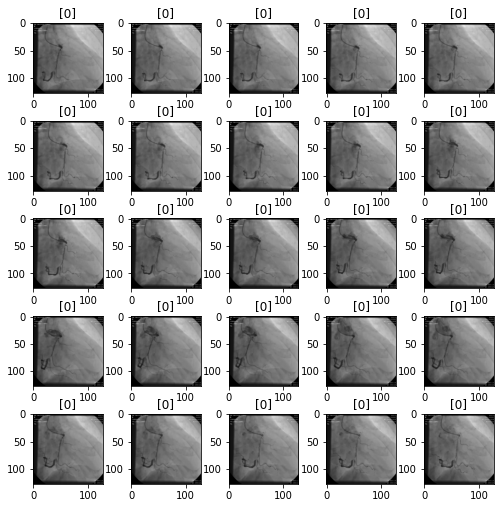

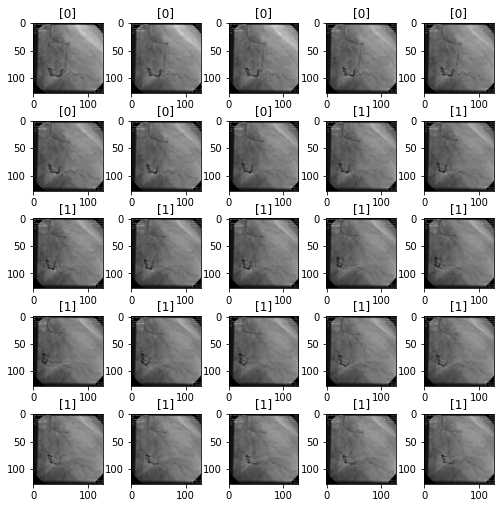

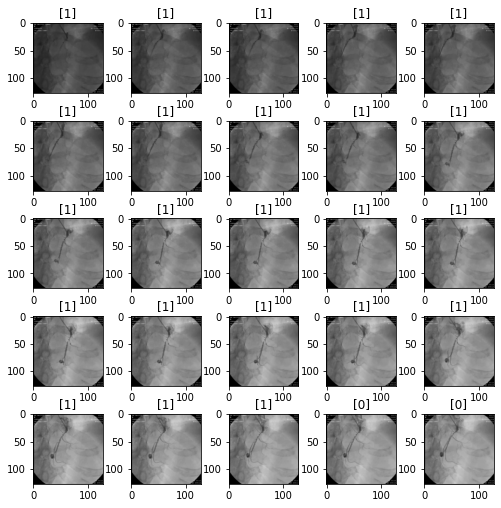

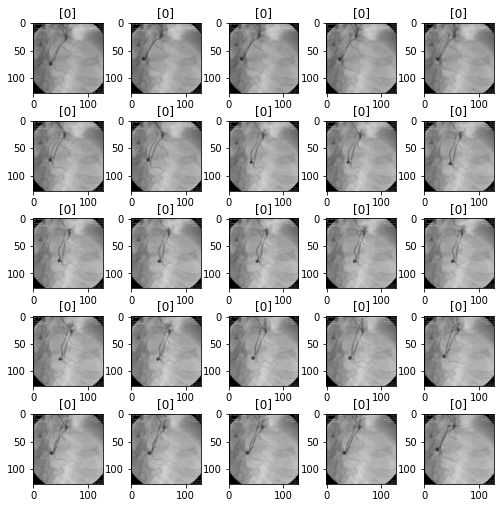

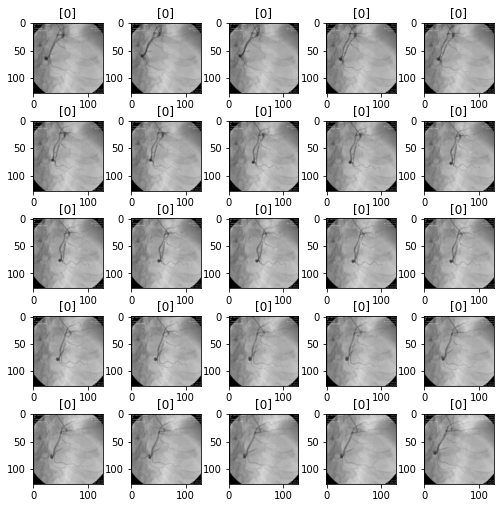

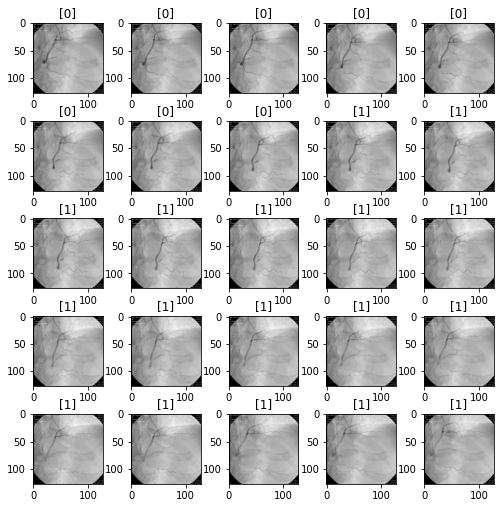

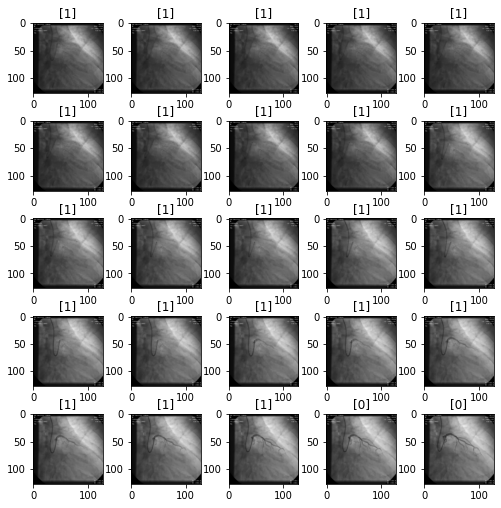

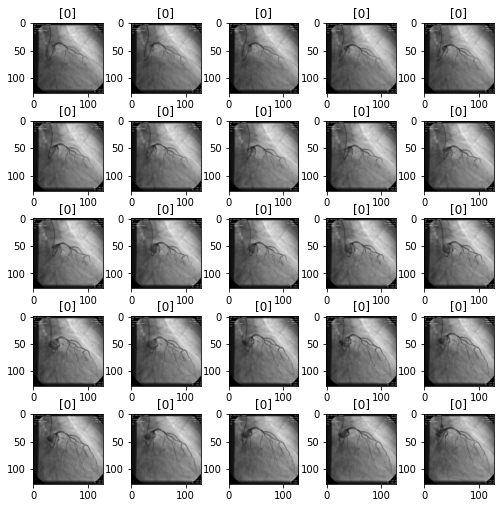

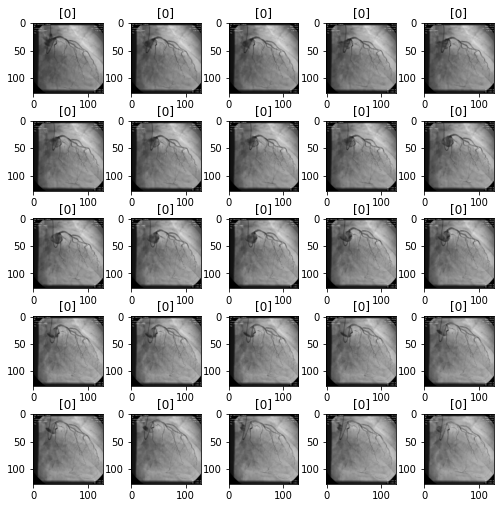

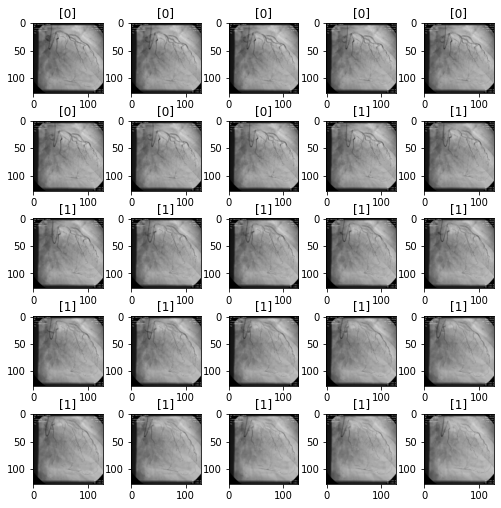

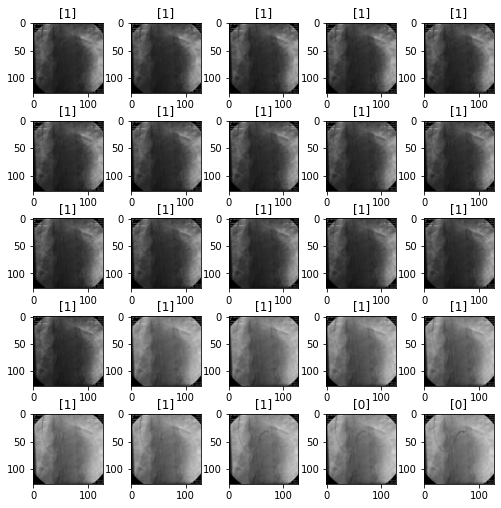

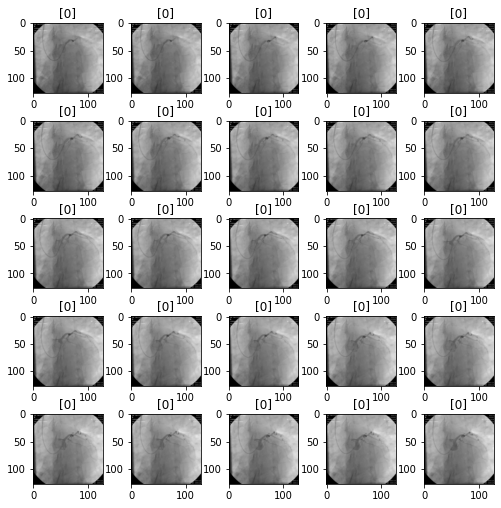

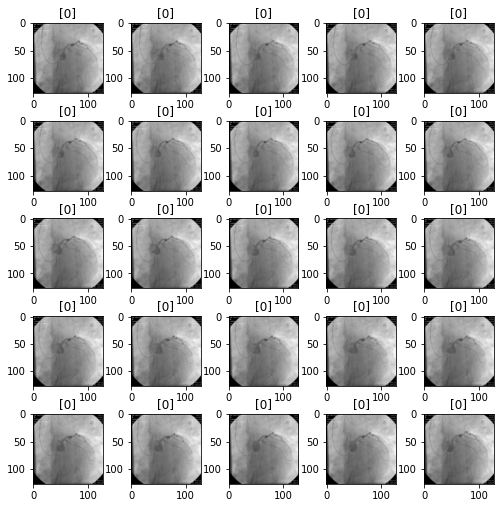

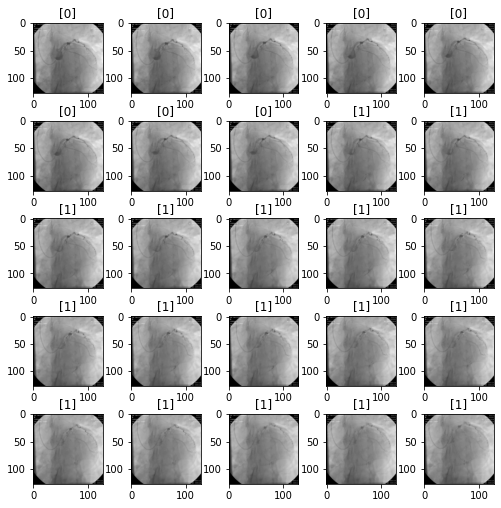

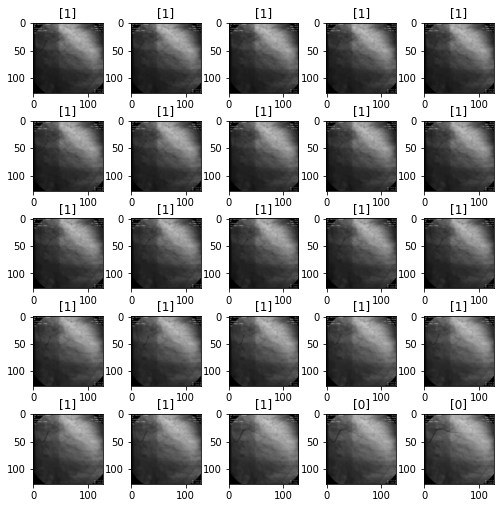

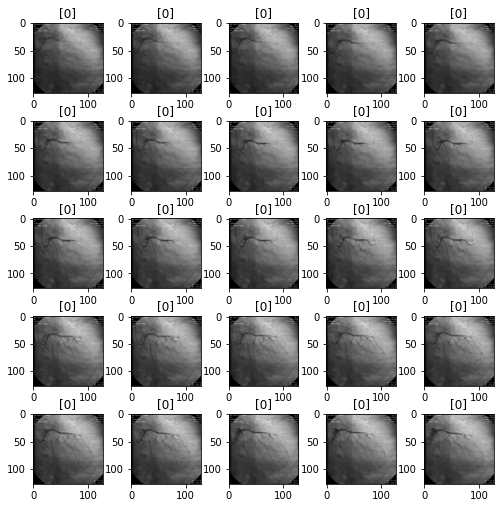

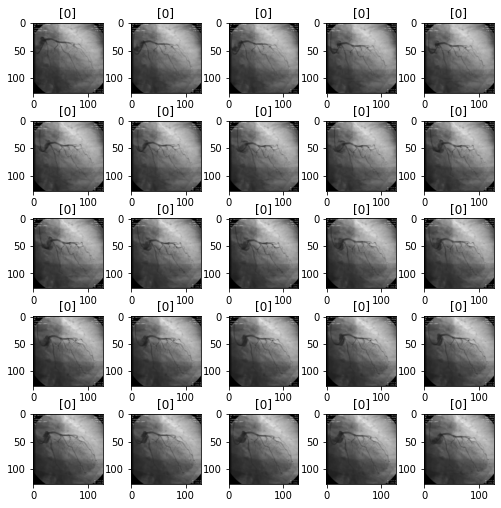

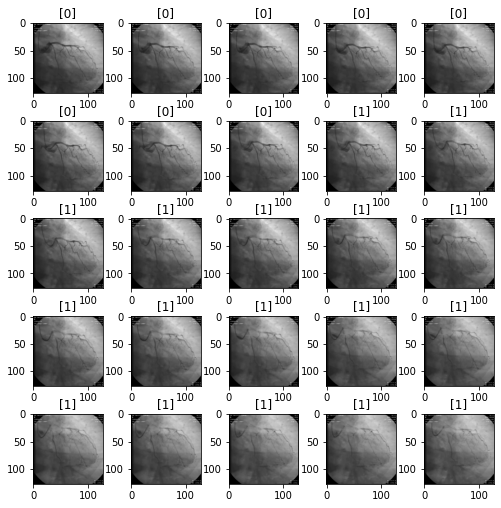

In [21]:
## Visualize first 100 images of X-ray angiogram  along with class labels
def getImage(folder_npz, folder_csv, folder_image):

  for each_npz, each_csv, each_imgFolder in zip(folder_npz, folder_csv, folder_image):

    print(each_npz)
    print(each_imgFolder)

    data = np.load(each_npz)

    dataFile = data.files
    print(dataFile, type(dataFile))

    for item in dataFile:
        print('Name of the file :: ' +str(item))
        print('Number of dimension of the array :: ' +str(data[item].ndim))
        print('Shape of the array :: ' +str(data[item].shape))

        reshapeData = data[item].transpose((0,-2, -1, 1))
        print("Data after reshaping")
        print(reshapeData.ndim, reshapeData.shape)

        modifyData = reshapeData.astype(np.uint8)
        print(modifyData.ndim, modifyData.shape)


        for i in range(len(modifyData)):
          
          ## Getting images from numpy array
          image = imageio.imwrite(each_imgFolder+'image_'+str(i)+ '.png', modifyData[i, :, :, :])

          ## Get all the image files from each folder
          imageAll_files = each_imgFolder+'*.png'
          glob.glob(imageAll_files) 

          images = [cv2.imread(image)   for image in glob.glob(imageAll_files)]

        print(type(images), len(images))

        ## Display all images
        rows = 5
        cols = 5

        ##for i in range(0, len(images), rows*cols):
        for i in range(0, 100, rows*cols):
          fig = plt.figure(figsize = (8, 8))

          for j in range(0, rows*cols):
            ax = fig.add_subplot(rows, cols, j+1)
            ax.title.set_text(each_csv.get(i+j+1))

            plt.imshow(images[i+j])
            plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
          plt.show

        
getImage(npz_folderPath, classLabel_DICT_LS, img_folderPath)     
        


